## Beer Recipe Analysis_Part1

### Introduction
The analysis is about how different factors associated with the last stage of the homebrewing process. The project is based on the linear regression model and a thorough process is carried out to test the linear assumptions and evaluate the hypothesis made for this project.

The data comes from Kaggle https://www.kaggle.com/jtrofe/beer-recipes, contains 22 variables related to different stages of beer homebrewing process, 75,000 recipe instances, and 176 classes regarding different beer styles (StyleID). 

Because regression analysis is a prediction problem, instead of using the original class as the target variable, one of the numerical feature is chosen as the target variable. 

### Background Knowledge for Beer Homebrewing

The image comes from http://discovermagazine.com/2015/oct/12-a-scientist-walks-into-a-bar


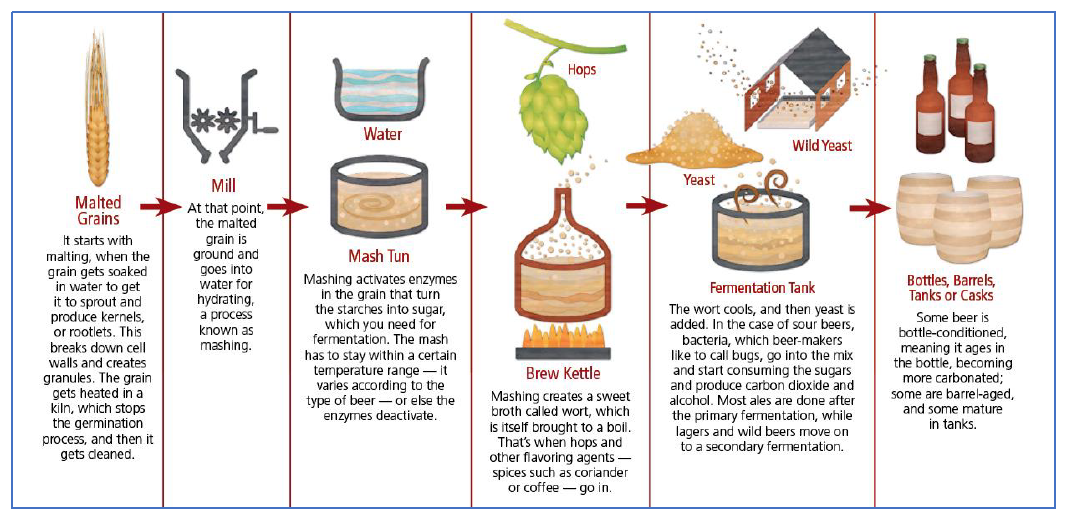

In [33]:
from IPython.display import Image
print("The image comes from http://discovermagazine.com/2015/oct/12-a-scientist-walks-into-a-bar")
Image(filename='beer2.png')

### Hypothesis

Since fermentation is often the last stage of the beer making process, we assume that the changes of gravity of wort after fermentation are highly depended on other factors in the brewing process.

The image comes from http://toast.life/theedit/2017/06/18/brew-s-craft-beer-starter-kit


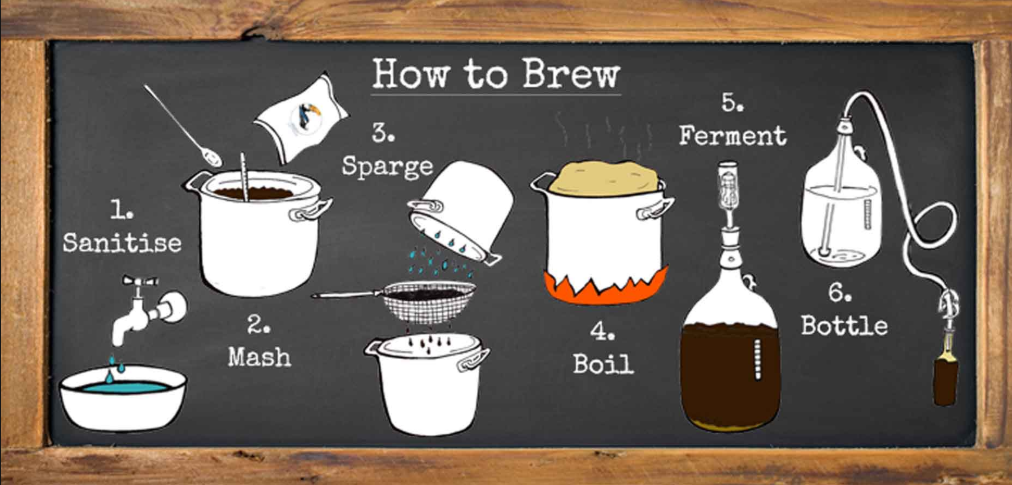

In [31]:
from IPython.display import Image
print("The image comes from http://toast.life/theedit/2017/06/18/brew-s-craft-beer-starter-kit")
Image(filename='beer1.png')

### Attributes Information

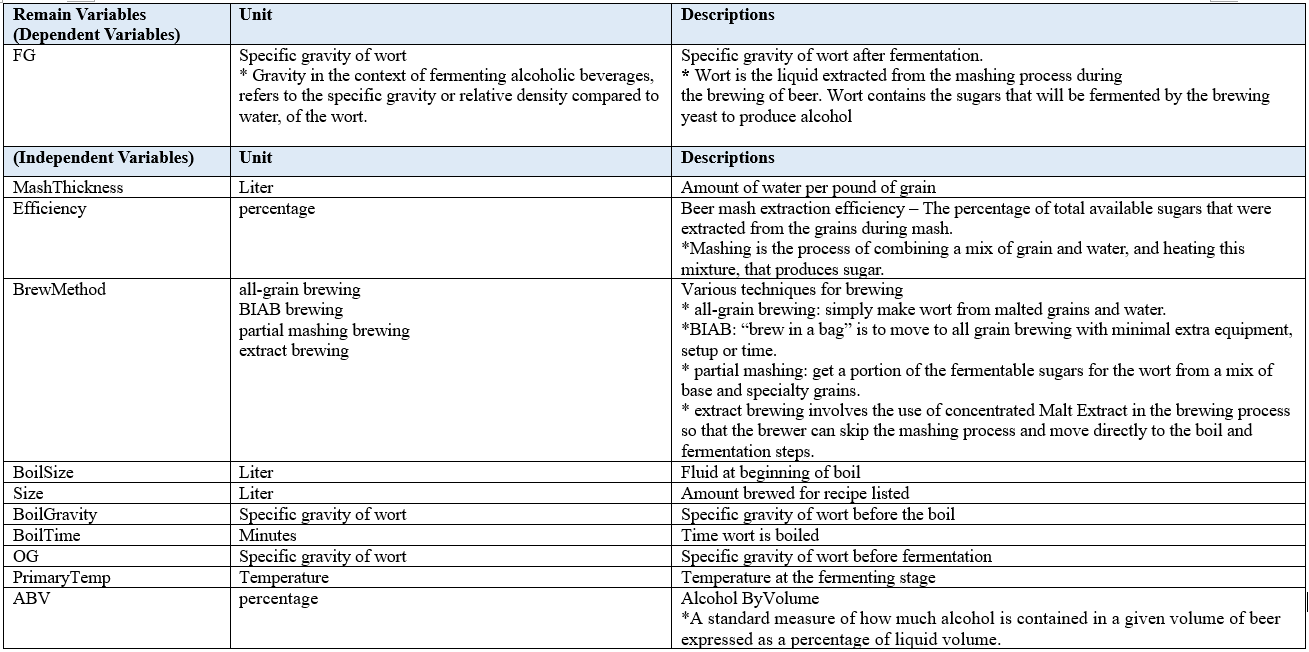

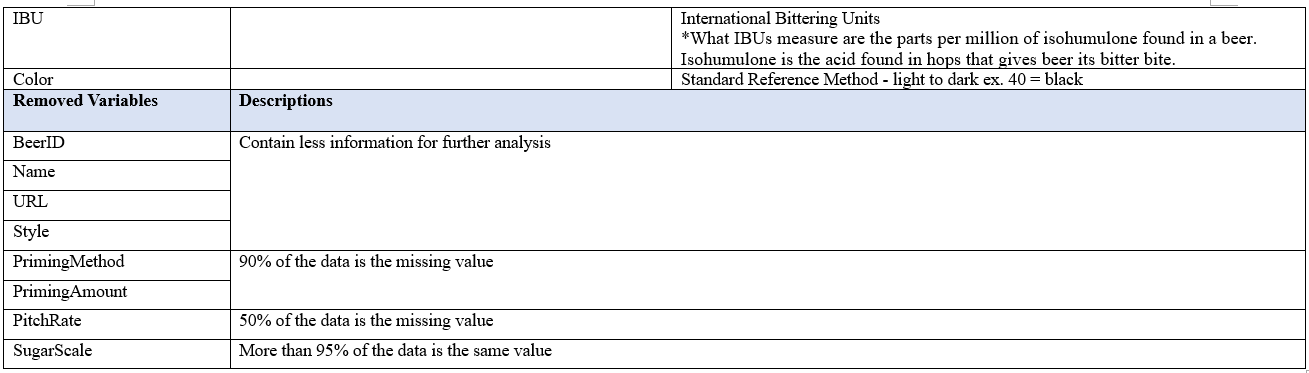

In [6]:
x=Image(filename="Beer attributes1.PNG")
y=Image(filename="Beer attributes2.PNG")
display(x,y)

### Methodology
The Part1 Notebook
1. Data exploratory and cleaning
2. Handle the imbalanced data: Sampling
3. Split the data into training and testing set and standardized the predictors

The Part2 Notebook
2. Test assumptions and build a full model with all the x variables on the training set 
3. Evaluate the baseline model performance on the testing set

The Part3 Notebok
1. Remove outliers and influential observations on the training set
2. Remove the high VIF variables on the training set and obtain the final model
3. Compare two sets of model performance on the testing set 
4. The Model Interpretation and the Conclusion

### 1. Data Exploratory and Cleaning

22 variables are included in the original recipe dataset. After an initial exploratory, some variables, such as “Name”, ”style”, ”url”, and “user id”, contains less information for regression analysis are then removed. Two variables “PrimingMethod” and “PrimingAmount” are removed because 90% of data are missing values, variable ”PitchRate” is also removed because more than 50% are missing benefits, lastly, variable “SugarScale” is removed because more than 90% of data are the same value.

Some remaining variables have missing values, variable "BoilGravity" has 4% of missing values, variable "MashThickness" has 40% of missing values and variable "PrimaryTemp" has 31% of missing values. After inspecting the distribution of these variables, the mean of these variables are taken to fill in for their missing values. 

I then calculated the IQR for all the variables (except for the class variable "StyleID"), removed outliers that have values greater or less than the 3* IQR from these variables. Lastly, because these variables are all in the different unit of measurements so the z score standard transformation is applied to make sure all the variables are on the same scale.

After the initial cleaning, there are 56,551 recipe instances left for further analysis. The clean data is saved in a csv file named "clean_tb.csv".


### 2. Handle the Imbalanced Data: Sampling

The nature of the data has 176 classes regarding different beer styles. Because regression analysis is a prediction problem, instead of using the original class as the target variable, one of the numerical feature "FG" is chosen as the target variable due to the assumption made above.

According to the distribution of the class variable "StyleID" (plot 1), the counts of recipes for the different style of homebrewed beer are highly imbalanced.

46 out of 176 kinds of style (shown in the table) have above 0.5% of recipe counts among 56,551 recipes, account for 82% of the total number of recipes(shown in pie graph). Therefore, I decide to set 0.5% of the total recipe counts as a threshold and sampled 250 recipes from these 46 kinds of homebrewed beer style for further analysis.

In [9]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt

beer=pd.read_csv("clean_tb.csv")

In [10]:
beer.columns.values

array(['StyleID', 'Size(L)', 'OG', 'FG', 'ABV', 'IBU', 'Color',
       'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency',
       'MashThickness', 'PrimaryTemp', 'BrewMethod_All Grain',
       'BrewMethod_BIAB', 'BrewMethod_Partial Mash', 'BrewMethod_extract'],
      dtype=object)

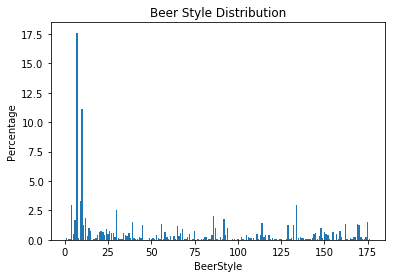

In [11]:
style_count=beer.groupby("StyleID").size().reset_index(name='counts')
style_count["percentage"]=round(((style_count["counts"]/56551)*100),2)


plt.bar(style_count["StyleID"],style_count["percentage"])
plt.xlabel("BeerStyle")
plt.ylabel("Percentage")
plt.title("Beer Style Distribution")
plt.show()

In [12]:
reach0_5=style_count.sort_values("counts",ascending=False).head(46)
counts=np.array(reach0_5[["counts"]]).reshape(-1)
np.sum(counts)

reach0_5.reset_index(drop=True,inplace=True)

reach0_5

,StyleID,counts,percentage
0,7,9952,17.60
1,10,6301,11.14
2,9,1866,3.30
3,134,1693,2.99
4,4,1681,2.97
5,30,1413,2.50
6,86,1145,2.02
7,12,1047,1.85
8,92,1004,1.78
9,6,969,1.71


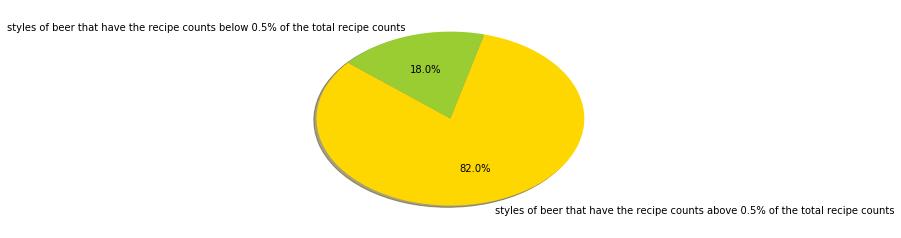

In [13]:

labels=["styles of beer that have the recipe counts above 0.5% of the total recipe counts","styles of beer that have the recipe counts below 0.5% of the total recipe counts"]
sizes = [41237, 9028]
colors = ['gold', 'yellowgreen']
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

In [14]:
#sample 250 recipes (0.5% of the total recipe counts) from the 46 kinds of homebrewed beer styles that have above 0.5% of total recipe counts

sample={}
for i in reach0_5["StyleID"]:
    sample[i]=beer.loc[beer['StyleID'] == i][:250]

In [23]:
#Concatenate all the sample data based on style ID into a table

style_id=reach0_5["StyleID"].tolist()
first2=pd.concat([sample[7],sample[10]],axis=0)
for i in style_id[2:]:
    if i == 9:
        tb=pd.concat([first2,sample[i]],axis=0)
    else:    
        tb=pd.concat([tb,sample[i]],axis=0)  

### 3. Split the data into training and testing set and standardized the predictors

In [24]:
#beertb drop styleID variable and excluded the y variable "FG" from the tb to preprae for further model building
whole_beer=tb.drop(tb[["StyleID"]],axis=1).reset_index(drop=True)
x=pd.DataFrame(whole_beer).drop(tb[["FG"]],axis=1)
y=pd.DataFrame(whole_beer[["FG"]])

In [25]:
#split the data into 80% and 20% for training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

##### To standardize test dataset, we can use mean and standard deviation of independent variables from training data. 

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
trasformed_xtrain=pd.DataFrame(scaler.transform(x_train),columns=['Size(L)', 'OG', 'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime',
       'BoilGravity', 'Efficiency', 'MashThickness', 'PrimaryTemp',
       'BrewMethod_All Grain', 'BrewMethod_BIAB',
       'BrewMethod_Partial Mash', 'BrewMethod_extract'])

In [28]:
trasformed_xtest=pd.DataFrame(scaler.transform(x_test),columns=['Size(L)', 'OG', 'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime',
       'BoilGravity', 'Efficiency', 'MashThickness', 'PrimaryTemp',
       'BrewMethod_All Grain', 'BrewMethod_BIAB',
       'BrewMethod_Partial Mash', 'BrewMethod_extract'])

In [29]:
trasformed_xtrain.to_csv("trasformed_xtrain.csv")
trasformed_xtest.to_csv("trasformed_xtest.csv")
#Save the data for next notebook
#y_train.to_csv("y_train.csv")
#y_test.to_csv("y_test.csv")